In [211]:
import pandas as pd
import numpy as np  


In [212]:
num_samples = 5

random_state = 12

Explore the metadata file

In [213]:
metadata = pd.read_csv("../Data/metadata.csv")

metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          1494 non-null   object
 1   split              1494 non-null   object
 2   instrument_type    1494 non-null   object
 3   features_path      1494 non-null   object
 4   features_md5_hash  1494 non-null   object
dtypes: object(5)
memory usage: 58.5+ KB


In [214]:
metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
0,S0000,train,commercial,train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
1,S0001,train,commercial,train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
2,S0002,train,commercial,train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
3,S0003,train,commercial,train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
4,S0004,train,commercial,train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


We complete the paths in the "features_path" column so that we can read the corresponding csv files more easily.

In [215]:
def replace_value (x):
    return x.replace(" ","")

new_path = "../Data/"

def fix_path(incomplete_path):
    return new_path + incomplete_path

metadata.features_path = metadata['features_path'].apply(replace_value)
metadata.features_path = metadata['features_path'].apply(fix_path)

metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
0,S0000,train,commercial,../Data/train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
1,S0001,train,commercial,../Data/train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
2,S0002,train,commercial,../Data/train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
3,S0003,train,commercial,../Data/train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
4,S0004,train,commercial,../Data/train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


Now store the various paths to csv folders into dictionaries, depending on whether the samples are in the train, val or test set. We do not have access to any test_files, so those can probably be disregarded.

In [216]:
train_files = metadata[metadata.split == "train"]["features_path"].to_dict()
val_files = metadata[metadata.split == 'val']["features_path"].to_dict()
test_files = metadata[metadata.split == 'test']["features_path"].to_dict()

# creates a dictionary that contains a path for each sample

Check what proportion of samples in the metadata file are associated with commercial vs SAM instruments

In [217]:
metadata.instrument_type.value_counts(normalize=True)

instrument_type
commercial    1.0
Name: proportion, dtype: float64

Turns out they are all commercial. Now examine the train_labels.csv file

In [218]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

train_labels.head()

,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide
sample_id,,,,,,,,,,
S0000,0,0,0,0,0,0,0,0,1,0
S0001,0,1,0,0,0,0,0,0,0,0
S0002,0,0,0,0,0,1,0,0,0,0
S0003,0,1,0,1,0,0,0,0,1,0
S0004,0,0,0,1,0,1,1,0,0,0


We can see what proportion of the labels contains each ion

In [219]:
for column_name in train_labels.columns:
    print(train_labels[column_name].value_counts(normalize=True))

basalt
0    0.87931
1    0.12069
Name: proportion, dtype: float64
carbonate
0    0.871353
1    0.128647
Name: proportion, dtype: float64
chloride
0    0.876658
1    0.123342
Name: proportion, dtype: float64
iron_oxide
0    0.775862
1    0.224138
Name: proportion, dtype: float64
oxalate
0    0.960212
1    0.039788
Name: proportion, dtype: float64
oxychlorine
0    0.762599
1    0.237401
Name: proportion, dtype: float64
phyllosilicate
0    0.679045
1    0.320955
Name: proportion, dtype: float64
silicate
0    0.862069
1    0.137931
Name: proportion, dtype: float64
sulfate
0    0.803714
1    0.196286
Name: proportion, dtype: float64
sulfide
0    0.952255
1    0.047745
Name: proportion, dtype: float64


Print the ions in descending order of frequency:

In [220]:
sums_normalized = train_labels.aggregate("sum").sort_values(ascending = False)

print(sums_normalized.index.values)


['phyllosilicate' 'oxychlorine' 'iron_oxide' 'sulfate' 'silicate'
 'carbonate' 'chloride' 'basalt' 'sulfide' 'oxalate']


Now put them in a bar plot

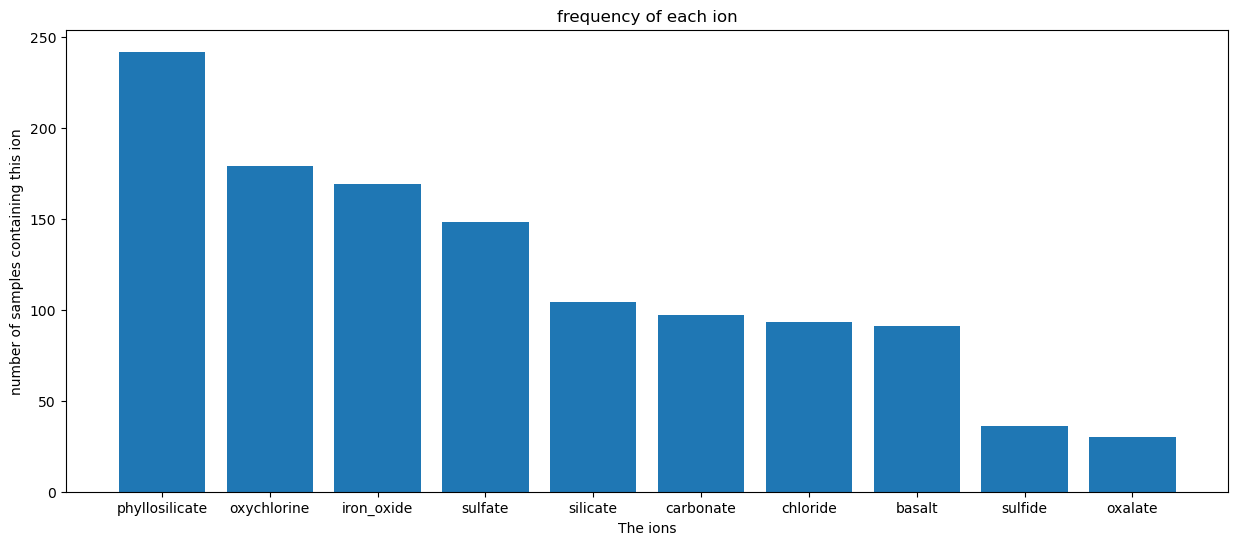

In [221]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar( sums_normalized.index.values, sums_normalized.values)

plt.title('frequency of each ion')

plt.xlabel("The ions")

plt.ylabel("number of samples containing this ion")

plt.show()



In [222]:
metadata[metadata.split !='test'].sample(5,random_state=random_state)

,sample_id,split,instrument_type,features_path,features_md5_hash
702,S0702,train,commercial,../Data/train_features/S0702.csv,cb7b6cca91878455322173ccd9f0777e
136,S0136,train,commercial,../Data/train_features/S0136.csv,8382e87e509e5954738019f2a375de6d
734,S0734,train,commercial,../Data/train_features/S0734.csv,6b9f1e7b5a31cb1d4447ffdd140c5be8
562,S0562,train,commercial,../Data/train_features/S0562.csv,b45edb273772b05b5adba339a6dc0223
79,S0079,train,commercial,../Data/train_features/S0079.csv,63446a9df69f481d110ee3289678efdc


Create a dictionary containing num_samples entries, with each entry being a dataframe corresponding to a sample. The sample identifier is used as the corresponding key. The samples are chosen at random from all of the samples except the "test" ones, to which we have no access. By taking num_samples to be the total number of samples one obtains a large dictionary with all samples there.

In [242]:
Dict = {}

metadata_slice = metadata[metadata.split !='test'].sample(num_samples,random_state=random_state)

for i, sample in enumerate(metadata_slice.sample_id):

    Dict[sample] = pd.read_csv( metadata_slice['features_path'].iloc[i])

Test this: choose the first entry in the dictionary.

In [224]:
Dict[metadata_slice.sample_id.iloc[0]]

,time,temp,m/z,abundance
0,0.00,29.876,0.0,1.481702e-09
1,0.00,29.876,1.0,2.241526e-09
2,0.00,29.876,2.0,8.769728e-10
3,0.00,29.876,3.0,1.347121e-09
4,0.00,29.876,4.0,1.022380e-07
...,...,...,...,...
38395,2002.42,1202.067,95.0,1.729906e-13
38396,2002.42,1202.067,96.0,2.741202e-13
38397,2002.42,1202.067,97.0,1.978337e-13
38398,2002.42,1202.067,98.0,3.225736e-13


For the samples in our dictionary we plot temperature as a function of time.

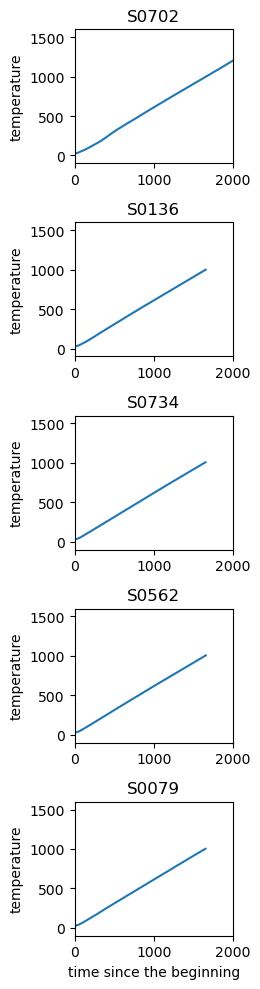

In [225]:

# Create a figure and an array of subplots indexed using ax

fig, ax = plt.subplots(num_samples,sharey = True,height_ratios=0.4*np.ones(num_samples))


for i, sample in enumerate(metadata_slice.sample_id): 

    ax[i].plot(Dict[sample].time,Dict[sample].temp)
    
    ax[i].set(xlim = (-1,2000),ylim = (-100,1600))

    ax[i].set_aspect('equal','box')
    
    plt.xlabel('time since the beginning')
    
    ax[i].set_ylabel('temperature')
    
    ax[i].set_title(sample)



fig.set_size_inches(14,10)



fig.tight_layout()

plt.show()



One can see the plots corresponding to various samples by running all cells above.

Now we plot the various ions grouped by m/z, on a logarithmic scale.

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_5814/391862025.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


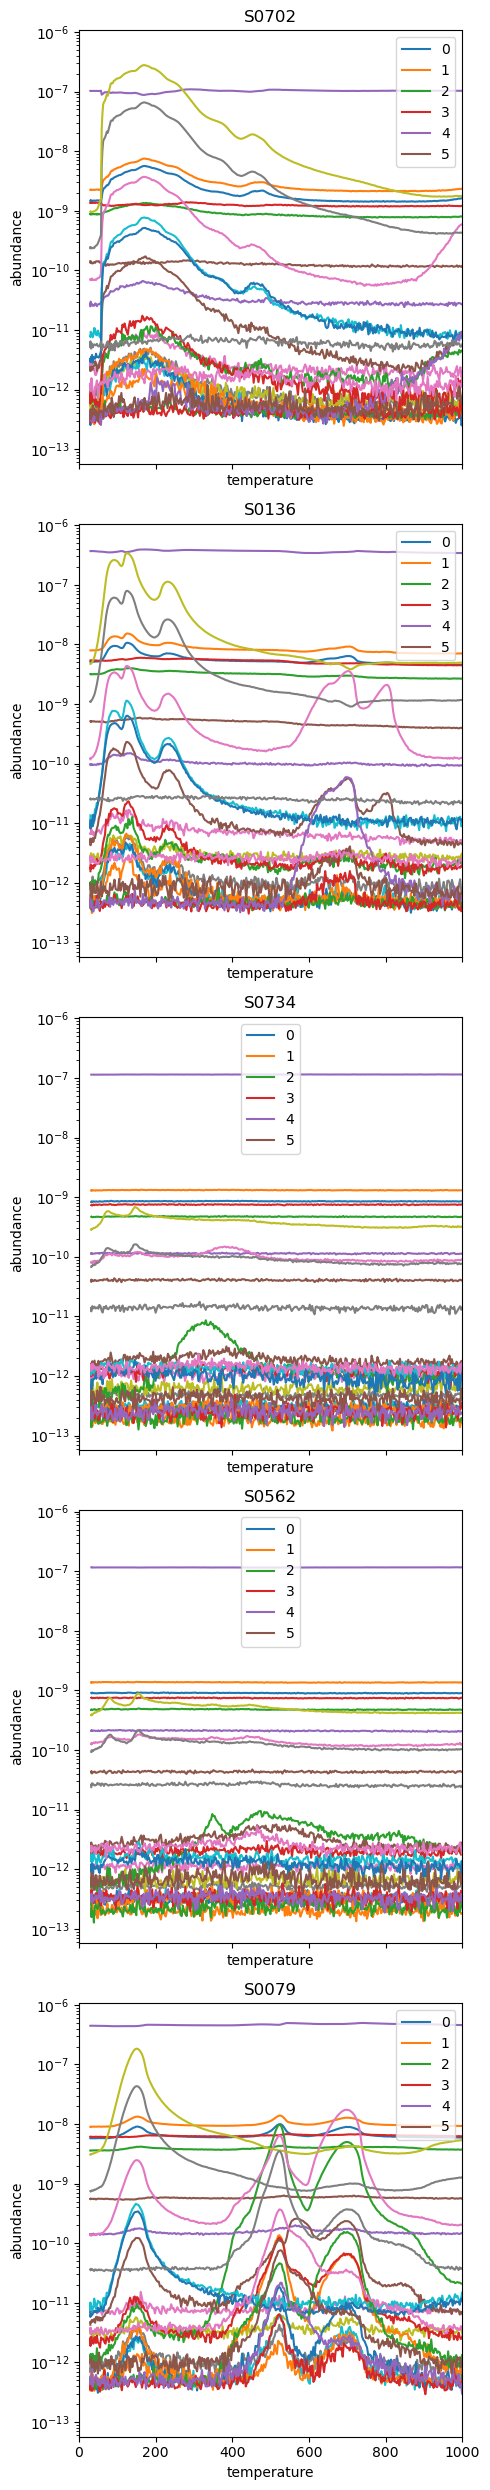

In [245]:
fig, ax = plt.subplots(num_samples,1,sharex = True,sharey = True,figsize = (5,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):

    

    plt.subplot(num_samples,1,i+1)

    

    for mz in range(0,28):
        X = Dict[sample][Dict[sample]['m/z'] == mz].temp
        y = Dict[sample][Dict[sample]['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")

        
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        
        # ax[i] = plt.show()
    
    plt.legend()


    
    plt.yscale('log')
    plt.title(sample)
    



fig.tight_layout()     
    
fig.show()






We do the data cleaning suggested by the post. Note that the part about removing non-integer values of m/z is probably not relevant to us, it seems that it only applies to SAM samples, which we do not have access to.

In [228]:

def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

# Check that indeed some values were dropped

for sample in Dict:

    Dataframe = Dict[sample]

    print ('Before the cleaning there were',len(Dataframe),'entries corresponding to',sample)

    Dataframe_clean = drop_non_int_and_He(Dataframe)

    print ('After the cleaning there are',len(Dataframe_clean),'entries corresponding to',sample)



Before the cleaning there were 38400 entries corresponding to S0702
After the cleaning there are 38016 entries corresponding to S0702
Before the cleaning there were 31900 entries corresponding to S0136
After the cleaning there are 31581 entries corresponding to S0136
Before the cleaning there were 31900 entries corresponding to S0734
After the cleaning there are 31581 entries corresponding to S0734
Before the cleaning there were 32000 entries corresponding to S0562
After the cleaning there are 31680 entries corresponding to S0562
Before the cleaning there were 31800 entries corresponding to S0079
After the cleaning there are 31482 entries corresponding to S0079


In [247]:
def subtract_min(df):

    

    df["abundance_minsub"] = df.groupby(["m/z"])["abundance"].transform(
        lambda x: (x - x.min())
    )

    return df


The next function scales the abundances by the formula $\frac{x-x_{\mathrm{min}}}{x_{max}-x_{min}}$ and forces them to be in the range (0,1)

In [248]:
from sklearn.preprocessing import minmax_scale

def scale_to_zero_one(df):
    df['zero_one_rescale'] = minmax_scale(df['abundance_minsub'])
    assert (df['zero_one_rescale'].max()<=1)
    return df
    


/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_5814/1462331516.py:75: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


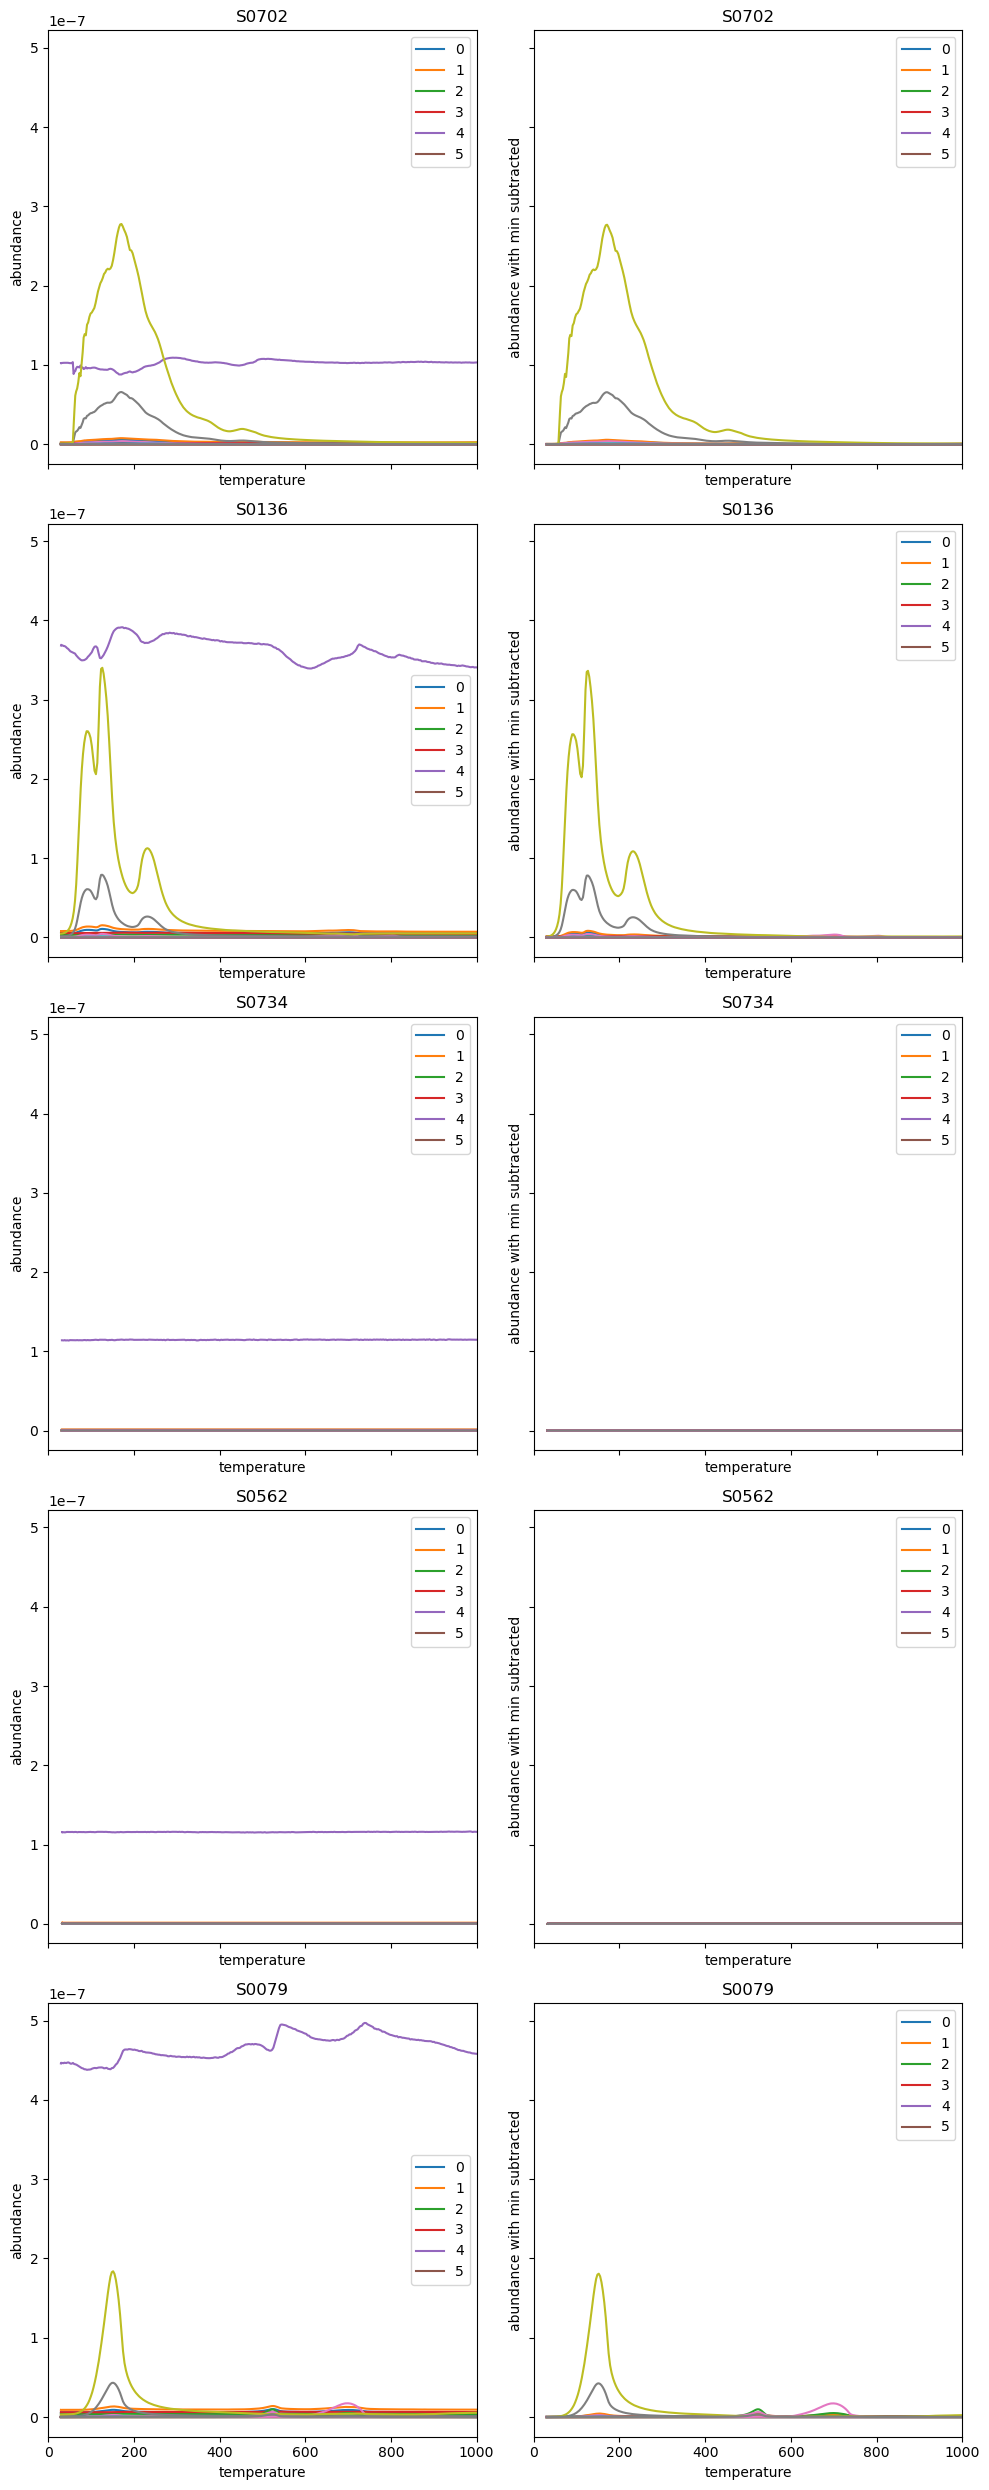

In [249]:
fig, ax = plt.subplots(num_samples,2,sharex = True,sharey = True,figsize = (10,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):



    df = Dict[sample]

    df_mod = subtract_min(drop_non_int_and_He(Dict[sample]))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].abundance_minsub

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Now we plot our samples with the 0-1 rescaling included

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_5814/139859379.py:75: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


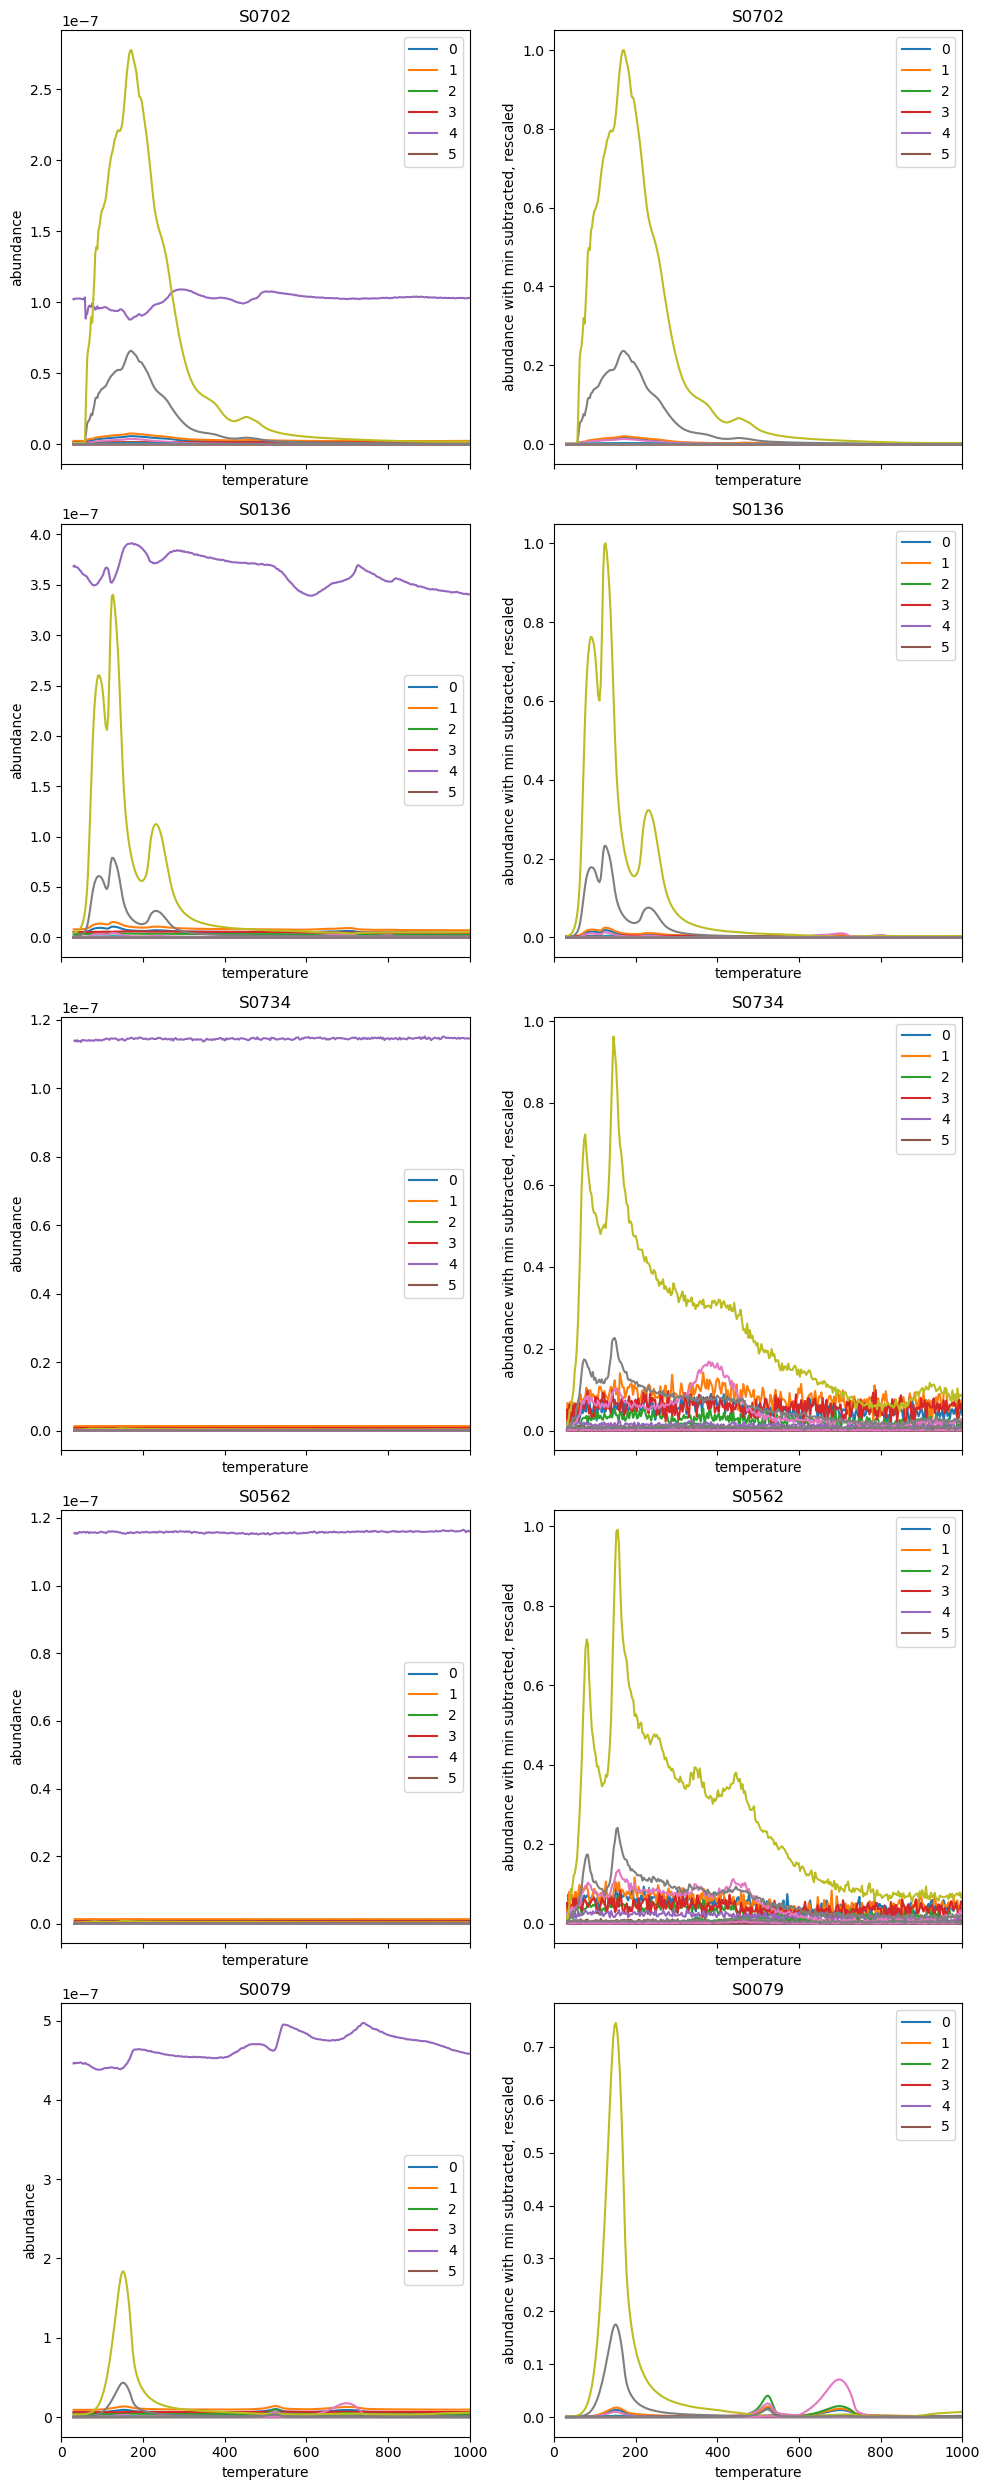

In [251]:
fig, ax = plt.subplots(num_samples,2,sharex = True,figsize = (10,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):



    df = Dict[sample]

    df_mod = scale_to_zero_one(subtract_min(drop_non_int_and_He(Dict[sample])))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()



